<a href="https://colab.research.google.com/github/Tanabordeee/Hatyai-Songkhla-Water-Level-Prediction/blob/main/WaterLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd

df = pd.read_csv("water_level.csv")

In [67]:
df.head()

,date,hour,ระดับตลิ่ง,ปริมาณน้ำ
0,26/11/2568,1.0,10.83,395.40
1,26/11/2568,2.0,10.81,391.80
2,26/11/2568,3.0,10.82,393.60
3,26/11/2568,4.0,10.89,406.20
4,26/11/2568,5.0,11.04,434.80


In [68]:
df.tail()

,date,hour,ระดับตลิ่ง,ปริมาณน้ำ
74371,01/06/2560,20.0,NaN,NaN
74372,01/06/2560,21.0,NaN,NaN
74373,01/06/2560,22.0,NaN,NaN
74374,01/06/2560,23.0,NaN,NaN
74375,01/06/2560,24.0,NaN,NaN


In [69]:
df.isnull().sum()

,0
date,0
hour,0
ระดับตลิ่ง,4804
ปริมาณน้ำ,8533


In [70]:
df.dropna(inplace=True)

In [71]:
df.isnull().sum()

,0
date,0
hour,0
ระดับตลิ่ง,0
ปริมาณน้ำ,0


In [72]:
df.isna().sum()

,0
date,0
hour,0
ระดับตลิ่ง,0
ปริมาณน้ำ,0


In [73]:
df.shape

(65843, 4)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

def convert_thai_date(d):
  day , month , year = map(int , d.split("/"))
  year -= 543
  return pd.Timestamp(year, month, day)

df["date"] = df["date"].apply(convert_thai_date)

# เรียงวันใหม่
df = df.sort_values(['date', 'hour']).reset_index(drop=True)

In [75]:
print(df.head())

        date  hour  ระดับตลิ่ง ปริมาณน้ำ
0 2017-06-01   6.0        4.58      1.10
1 2017-06-01   9.0        4.58      1.10
2 2017-06-01  12.0        4.58      1.10
3 2017-06-01  15.0        4.58      1.10
4 2017-06-01  18.0        4.58      1.10


In [76]:
new_df = df.groupby("date")["ระดับตลิ่ง"].mean().reset_index()
print(new_df.tail())

           date  ระดับตลิ่ง
2823 2025-11-22   10.628333
2824 2025-11-23    9.317500
2825 2025-11-24   10.532083
2826 2025-11-25   11.476667
2827 2025-11-26   10.795714


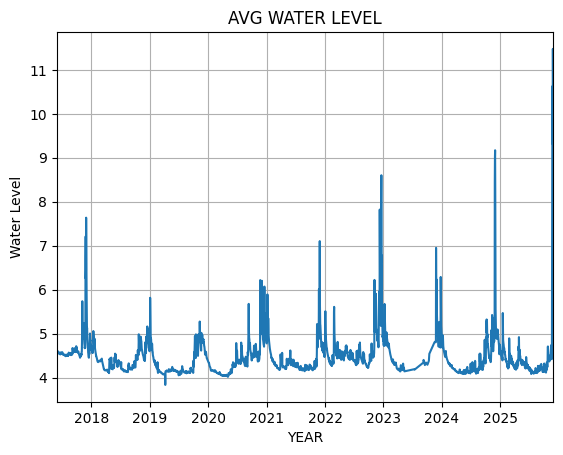

In [77]:
import matplotlib.pyplot as plt

plt.plot(new_df["date"] , new_df["ระดับตลิ่ง"])
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("Water Level")
plt.title("AVG WATER LEVEL")
plt.xlim(new_df["date"].min() , new_df["date"].max())
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65843 entries, 0 to 65842
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        65843 non-null  datetime64[ns]
 1   hour        65843 non-null  float64       
 2   ระดับตลิ่ง  65843 non-null  float64       
 3   ปริมาณน้ำ   65843 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.0+ MB


In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
target_scaled = scaler.fit_transform(df[["ระดับตลิ่ง"]])

In [80]:
import numpy as np
SEQ_LEN = 23
x = []
y = []

for i in range(SEQ_LEN , len(target_scaled)):
  x.append(target_scaled[i-SEQ_LEN:i])
  y.append(target_scaled[i])

x = np.array(x)
y = np.array(y)

In [81]:
train_size = int(len(x) * 0.7)
x_train = x[:train_size]
y_train = y[:train_size]

In [82]:
val_size = int(len(x) * 0.15)
x_val = x[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

In [83]:
x_test = x[train_size+val_size:]
y_test = y[train_size+val_size:]

In [84]:
!pip install tensorflow

In [85]:
from keras.models import Sequential
from keras.layers import LSTM ,  Dense , Input

model = Sequential([
    LSTM(50, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer="adam" , loss="mse")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
history = model.fit(
    x_train , y_train,
    validation_data=(x_val , y_val),
    epochs=50,
    batch_size=32
)

Epoch 1/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 6.1857e-04 - val_loss: 3.1796e-05
Epoch 2/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2.7356e-05 - val_loss: 2.0559e-05
Epoch 3/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.7374e-05 - val_loss: 1.7161e-05
Epoch 4/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1.4430e-05 - val_loss: 1.1730e-05
Epoch 5/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 9.4189e-06 - val_loss: 1.1730e-05
Epoch 6/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 8.3794e-06 - val_loss: 7.6314e-06
Epoch 7/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 7.0819e-06 - val_loss: 6.7902e-06
Epoch 8/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 6.7432e-06 - val_loss: 9.4536e-06
Epoch 9/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 6.4589e-06 - val_loss: 9.3713e-06
Epoch 10/50
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 7.0621e-06 - val_loss: 6.1910e-06
Epoch 11/50
1440/1440 ━━━━━━━━━━━━━━━━━

In [87]:
y_pred = model.predict(x_test)

309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


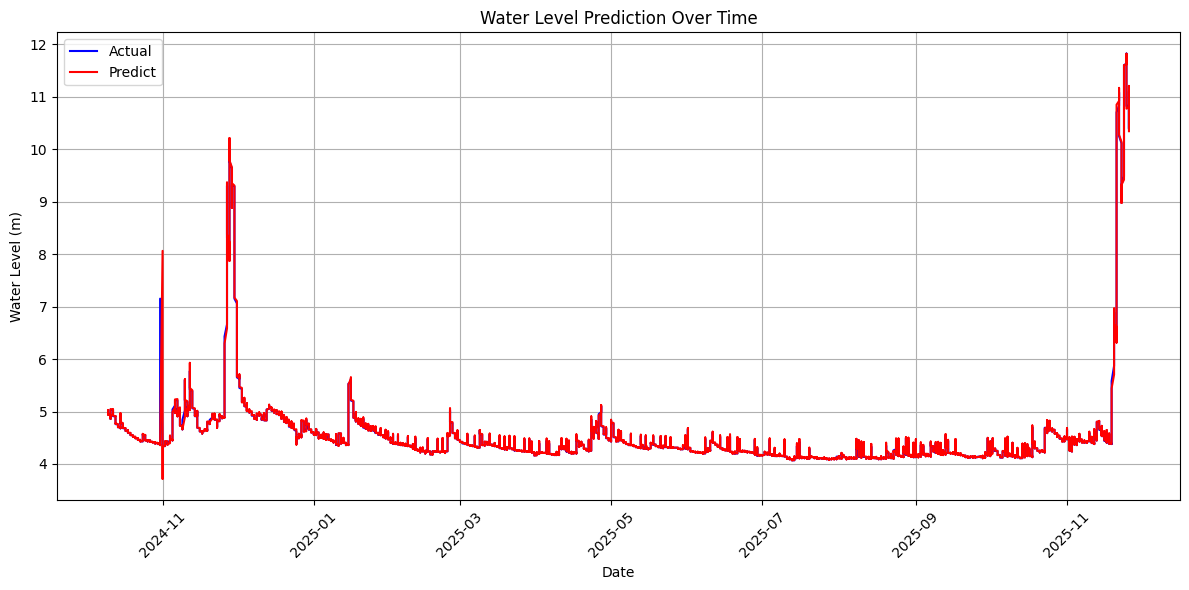

In [88]:
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
start_index_for_y_test_in_y = train_size + val_size
start_date_index = SEQ_LEN + start_index_for_y_test_in_y

test_dates = df["date"].iloc[start_date_index:].reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_true , label="Actual" , color="blue")
plt.plot(test_dates, y_pred , label="Predict" , color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Water Level (m)")
plt.title("Water Level Prediction Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# สมมติ SEQ_LEN = 23
SEQ_LEN = 23

# เอา 23 ชั่วโมงล่าสุดเป็น input
last_seq = target_scaled[-SEQ_LEN:]  # shape = (23,1)
last_seq = np.expand_dims(last_seq, axis=0)  # shape = (1, 23, 1) เพื่อให้ model รับได้

# predict 1 ชั่วโมงถัดไป
next_hour_scaled = model.predict(last_seq)
print("Scaled prediction:", next_hour_scaled)

# แปลงกลับเป็นค่าเดิม
scaler = MinMaxScaler()
scaler.fit(df[["ระดับตลิ่ง"]])  # fit อีกครั้งกับ data เดิม
next_hour = scaler.inverse_transform(next_hour_scaled)
print("Predicted water level (m):", next_hour[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Scaled prediction: [[0.81927353]]
Predicted water level (m): 10.329006


In [90]:
df.tail()

,date,hour,ระดับตลิ่ง,ปริมาณน้ำ
65838,2025-11-26,10.0,10.75,382.50
65839,2025-11-26,11.0,10.66,369.00
65840,2025-11-26,12.0,10.53,351.25
65841,2025-11-26,13.0,10.44,340.00
65842,2025-11-26,14.0,10.39,333.95
